[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/royforestano/Deep_Learning_Symmetries/blob/main/Deep_Learning_Symmetries_and_Their_Lie_Groups_Algebras_Subalgebras_from_First_Principles/sym_demo.ipynb)

# Deep Learning Symmetries and Their Lie Groups, Algebras, and Subalgebras from First Principles - Demonstration

Author: Roy Forestano

Date of Completion: 13 January 2023

Connected to the paper on: Deep Learning Symmetries and Their Lie Groups, Algebras, and Subalgebras from First Principles (arXiv:2301.05638: https://arxiv.org/abs/2301.05638)

This notebook will reproduce examples in the paper.

In [1]:
!pip install torch

In [1]:
from sym_utils import *
%matplotlib inline

Using cpu device


In [2]:
def oracle_norm(data):
    return torch.norm(data,dim=1)

#if n_dim==4:
def oracle_lorentz(data):
     return (data[:,0].reshape(data.shape[0],1))**2 \
             - (data[:,1].reshape(data.shape[0],1))**2 \
             - (data[:,2].reshape(data.shape[0],1))**2 \
             - (data[:,3].reshape(data.shape[0],1))**2   #- torch.sum( (data[:,1:].reshape(data.shape[0],3))**2,dim=1)

#if n_dim==2:
def oracle_squeeze(data):
    return (data[:,0]*data[:,1]).reshape(data.shape[0],1)

def oracle_piecewise_linear(data):
    a = data[:,0]
    b = -data[:,1]
    return torch.where(a >= 0, a, b)

def oracle_manhattan(data):
    return torch.abs(data[:,0])+torch.abs(data[:,1])

---

# How to run all relevant functions from sym_utils.py

## Choose Dimensions, Generators, Oracle, and Model Hyperparameters

In [5]:
n       = 300
n_dim   = 3
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

## Run the Model and View the Training Loss

Using cpu device
Epoch 5000   |  Train Loss: 6.460534969296429e-076
Total Time: 32.42180991
Complete.


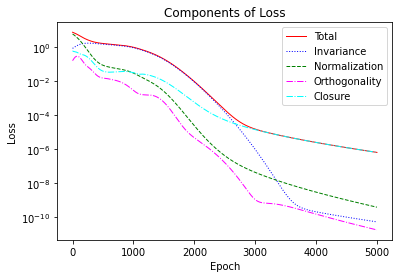

In [6]:
# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

## Visualize Results

Create a Symmetry Vector Plot (for $n_{dim} = 2$)

In [7]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)
#plt.savefig(path+'sym_vec_norm.pdf')

View the Resulting Generator(s)

In [8]:
#path = 'plots/'

Generator 1: 
 tensor([[-3.8949e-04, -4.2817e-01,  7.7429e-01],
        [ 4.2781e-01, -2.0292e-04,  4.6616e-01],
        [-7.7449e-01, -4.6583e-01, -4.0571e-04]], requires_grad=True) 

Generator 2: 
 tensor([[-3.3608e-04, -5.2482e-01, -6.3286e-01],
        [ 5.2518e-01, -3.0187e-04,  5.6909e-01],
        [ 6.3256e-01, -5.6941e-01, -3.6108e-04]], requires_grad=True) 

Generator 3: 
 tensor([[-2.7092e-04, -7.3566e-01,  1.2540e-03],
        [ 7.3566e-01, -4.9745e-04, -6.7735e-01],
        [-7.6426e-04,  6.7735e-01, -2.3145e-04]], requires_grad=True) 



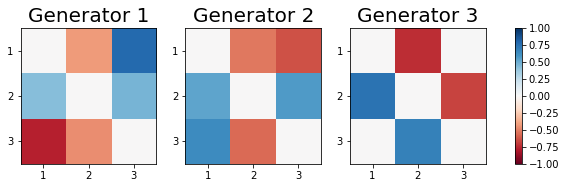

In [9]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)
#plt.savefig(path+'so3ng3.pdf')

Visualize Rotation Axis Results for  $n_{dim} = 3$, $n_{gen} = 3$

Axis 1: [-0.465989 0.774387 0.427995]
Axis 2: [0.569255 0.632714 -0.524997]
Axis 3: [0.677349 0.001010 0.735661]


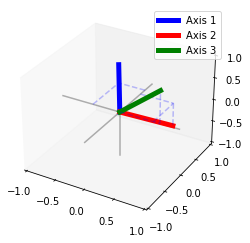

In [10]:
if n_gen==3 and n_dim==3:
    visualize_generator_axes(gens_pred)
#plt.savefig(path+'so3ng3_axes.pdf')

View the Resulting Structure Constants (for $n_{gen}>1$)

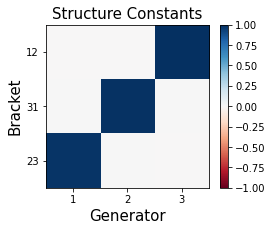

In [11]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)
#plt.savefig('so3_sc.png',bbox_inches='tight')

## Verify Results

Verify the Structure Constants Produce an Algebra (for $n_{gen}>1$)

In [12]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000051 -0.000008 1.000052]
 
 C = 
  [[-0.000429 0.000057 -0.000269]
 [0.000039 0.000498 0.000112]
 [-0.000337 -0.000009 0.000931]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0002980084993316654. 
 

31: 
 Structure Constants = [0.004404 0.985286 0.000000]
 
 C = 
  [[0.000217 -0.006294 -0.012840]
 [0.005386 -0.000188 0.006318]
 [0.012595 -0.006329 0.000960]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0056807260325692326. 
 

23: 
 Structure Constants = [0.982003 0.000113 -0.000246]
 
 C = 
  [[0.000333 -0.007466 0.013835]
 [0.008178 -0.000280 0.008343]
 [-0.014167 -0.007963 0.000927]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.006832543244556112. 
 

Total MAE = 0.01281127777645701


Verify Orthogonality (for $n_{gen}>1$)

In [13]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0000028042 rad, 89.9998393300 deg
Angle between generator 1 and 3: 0.0000034732 rad, 89.9998009997 deg
Angle between generator 2 and 3: 0.0000032546 rad, 89.9998135226 deg


---

# Orthogonal Groups: Figures 1-3: $n_{dim} = 2$, $n_{gen}=1,2$

##  $n_{dim} = 2$, $n_{gen}=1$

Using cpu device
Epoch 4823   |  Train Loss: 9.903447421117518e-265
Reached Near Machine Zero
Total Time: 8.72344661
Complete.


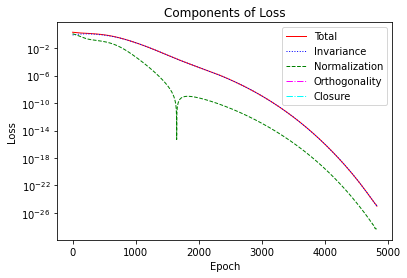

In [16]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

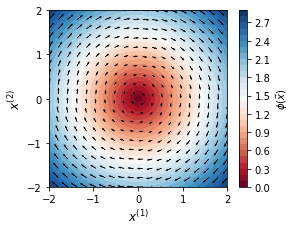

In [17]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)

Generator: 
 tensor([[-5.0000e-04,  1.0000e+00],
        [-1.0000e+00, -5.0000e-04]], requires_grad=True) 



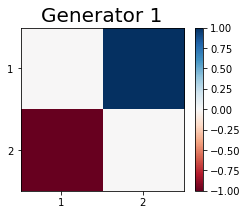

In [18]:
figsizeg = (4,3)
rows = 1
cols = 1

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

##  $n_{dim} = 2$, $n_{gen}=2$

Using cpu device
Epoch 1000   |  Train Loss: 1.724274261401104
Total Time: 4.18327904
Complete.


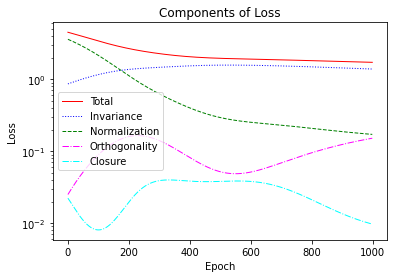

In [20]:
n       = 300
n_dim   = 2
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 1000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 0.7606,  0.5568],
        [-0.4325,  0.7251]], requires_grad=True) 

Generator 2: 
 tensor([[-0.1011,  0.8797],
        [-0.8881, -0.5615]], requires_grad=True) 



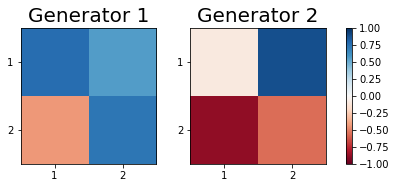

In [21]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

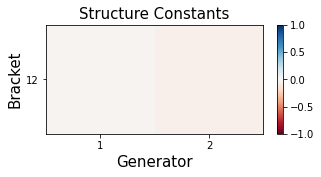

In [22]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [23]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.026388 -0.048849]
 
 C = 
  [[-0.098916 -0.167410]
 [-0.222330 0.105752]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 0.14860185089656738. 
 

Total MAE = 0.14860185089656738


In [24]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: -0.2816836869 rad, 106.3607181323 deg


# Orthogonal Groups: Figures 4-6: $n_{dim} = 3$, $n_{gen}=1,2,3,4$

##  $n_{dim} = 3$, $n_{gen}=1$

Using cpu device
Epoch 4527   |  Train Loss: 9.997134726226124e-265
Reached Near Machine Zero
Total Time: 10.21921468
Complete.


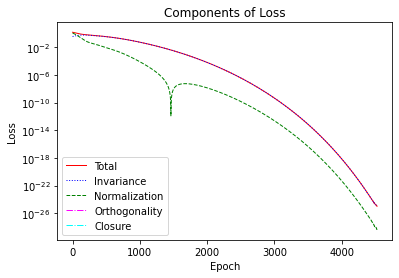

In [26]:
n       = 300
n_dim   = 3
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = True )

Generator: 
 tensor([[-2.4406e-04, -3.6809e-01,  5.9383e-01],
        [ 3.6766e-01, -3.2361e-04,  7.1557e-01],
        [-5.9409e-01, -7.1535e-01, -4.3233e-04]], requires_grad=True) 



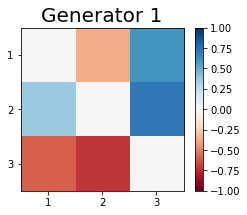

In [27]:
figsizeg = (4,3)
rows = 1
cols = 1

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

##  $n_{dim} = 3$, $n_{gen}=2$

Using cpu device
Epoch 5000   |  Train Loss: 0.44134500334488985
Total Time: 19.48703003
Complete.


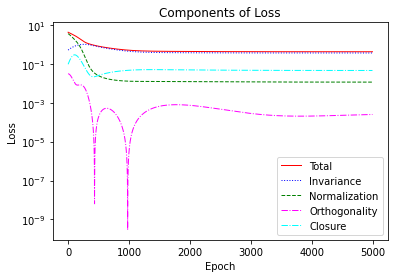

In [29]:
n       = 300
n_dim   = 3
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 0.0710,  0.4704,  0.8317],
        [ 0.3719,  0.2693,  0.7431],
        [-0.3046, -0.1869, -0.3099]], requires_grad=True) 

Generator 2: 
 tensor([[-0.2904,  0.3027, -0.7011],
        [-0.3266,  0.3717,  0.6882],
        [ 0.5456, -0.5046, -0.0877]], requires_grad=True) 



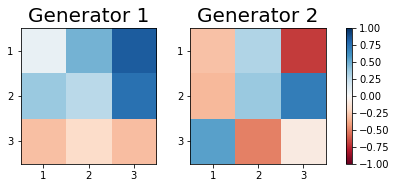

In [30]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

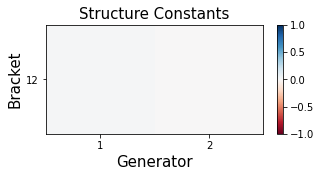

In [31]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [32]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.010630 -0.000417]
 
 C = 
  [[-0.026900 -0.304094 -0.008787]
 [0.300028 0.017147 0.060483]
 [0.106078 -0.140713 0.009428]] 

The structure constants were NOT found successfully with a mean absolute error (MAE) of 0.10818440181528702. 
 

Total MAE = 0.10818440181528702


In [33]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.3541975929 rad, 69.2557252771 deg


##  $n_{dim} = 3$, $n_{gen}=3$

Using cpu device
Epoch 5000   |  Train Loss: 6.460534969296429e-076
Total Time: 33.69455314
Complete.


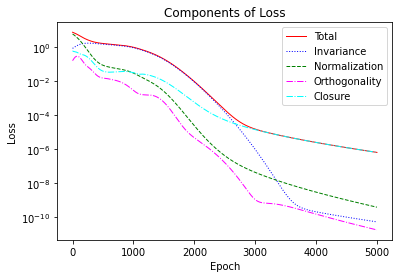

In [36]:
n       = 300
n_dim   = 3
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[-3.8949e-04, -4.2817e-01,  7.7429e-01],
        [ 4.2781e-01, -2.0292e-04,  4.6616e-01],
        [-7.7449e-01, -4.6583e-01, -4.0571e-04]], requires_grad=True) 

Generator 2: 
 tensor([[-3.3608e-04, -5.2482e-01, -6.3286e-01],
        [ 5.2518e-01, -3.0187e-04,  5.6909e-01],
        [ 6.3256e-01, -5.6941e-01, -3.6108e-04]], requires_grad=True) 

Generator 3: 
 tensor([[-2.7092e-04, -7.3566e-01,  1.2540e-03],
        [ 7.3566e-01, -4.9745e-04, -6.7735e-01],
        [-7.6426e-04,  6.7735e-01, -2.3145e-04]], requires_grad=True) 



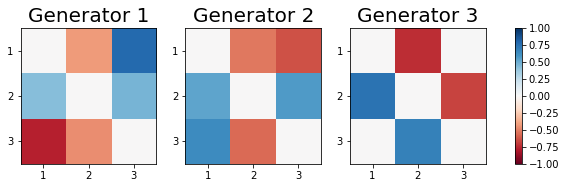

In [37]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

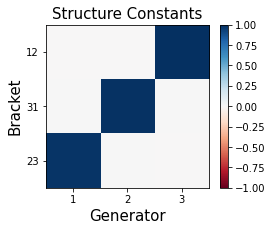

In [38]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [39]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000051 -0.000008 1.000052]
 
 C = 
  [[-0.000429 0.000057 -0.000269]
 [0.000039 0.000498 0.000112]
 [-0.000337 -0.000009 0.000931]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0002980084993316654. 
 

31: 
 Structure Constants = [0.004404 0.985286 0.000000]
 
 C = 
  [[0.000217 -0.006294 -0.012840]
 [0.005386 -0.000188 0.006318]
 [0.012595 -0.006329 0.000960]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0056807260325692326. 
 

23: 
 Structure Constants = [0.982003 0.000113 -0.000246]
 
 C = 
  [[0.000333 -0.007466 0.013835]
 [0.008178 -0.000280 0.008343]
 [-0.014167 -0.007963 0.000927]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.006832543244556112. 
 

Total MAE = 0.01281127777645701


In [40]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0000028042 rad, 89.9998393300 deg
Angle between generator 1 and 3: 0.0000034732 rad, 89.9998009997 deg
Angle between generator 2 and 3: 0.0000032546 rad, 89.9998135226 deg


##  $n_{dim} = 3$, $n_{gen}=4$

Using cpu device
Epoch 5000   |  Train Loss: 1.4877756489837164
Total Time: 64.71653295
Complete.


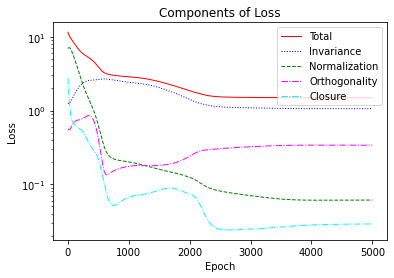

In [42]:
n       = 300
n_dim   = 3
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 0.2923, -0.2524,  0.2787],
        [ 0.3475,  0.2560,  0.8031],
        [-0.3595, -0.7420,  0.3706]], requires_grad=True) 

Generator 2: 
 tensor([[-0.3010,  0.5574,  0.5159],
        [-0.6673, -0.2619,  0.3701],
        [-0.4385, -0.4464, -0.3957]], requires_grad=True) 

Generator 3: 
 tensor([[-0.2866, -0.7847,  0.5220],
        [ 0.6819, -0.2577, -0.1805],
        [-0.4595,  0.1109, -0.3496]], requires_grad=True) 

Generator 4: 
 tensor([[ 0.2659,  0.2825,  0.6700],
        [-0.1924,  0.2524, -0.4928],
        [-0.7234,  0.5489,  0.3427]], requires_grad=True) 



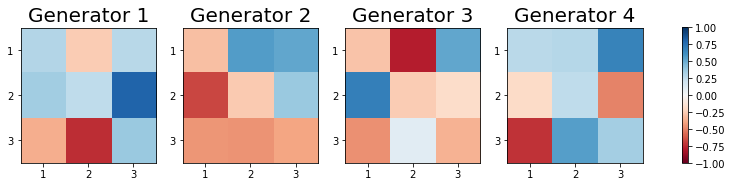

In [43]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

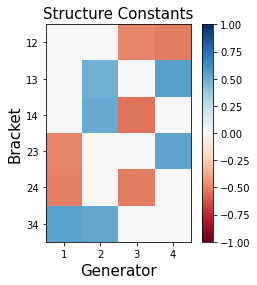

In [44]:
if n_gen>1:
    figsizec=(4,4)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [45]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.000934 0.001919 -0.488927 -0.510847]
 
 C = 
  [[0.033958 0.028502 -0.011668]
 [0.027532 -0.055369 -0.126061]
 [-0.011216 -0.125298 0.025162]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.04941858098155275. 
 

13: 
 Structure Constants = [0.000283 0.483317 0.000009 0.543395]
 
 C = 
  [[0.161079 -0.040328 0.003737]
 [-0.041694 -0.156064 0.026883]
 [0.002033 0.028371 -0.009805]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.05222148283141665. 
 

14: 
 Structure Constants = [-0.000678 0.502924 -0.543063 -0.002487]
 
 C = 
  [[-0.013763 -0.042218 -0.107700]
 [-0.040805 0.117285 0.130554]
 [-0.108075 0.131418 -0.104099]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.08843529067650399. 
 

23: 
 Structure Constants = [-0.488266 -0.000446 0.001280 0.526644]
 
 C = 
  [[-0.148755 0.066309 -0.010467]
 [0.066488 0.096271 -0.106204]
 [-0.

In [46]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.3232676673 rad, 71.1393448774 deg
Angle between generator 1 and 3: -0.4356684243 rad, 115.8278343843 deg
Angle between generator 1 and 4: 0.2412684934 rad, 76.0385800388 deg
Angle between generator 2 and 3: 0.2837752424 rad, 73.5143471557 deg
Angle between generator 2 and 4: -0.4489853535 rad, 116.6786039027 deg
Angle between generator 3 and 4: 0.2651729795 rad, 74.6227684808 deg


# Orthogonal Groups: Figures 7-12: $n_{dim} = 4$, $n_{gen}=2,3,4,6$

##  $n_{dim} = 4$, $n_{gen} =2$

Using cpu device
Epoch 5000   |  Train Loss: 8.292225364292905e-076
Total Time: 20.60311604
Complete.


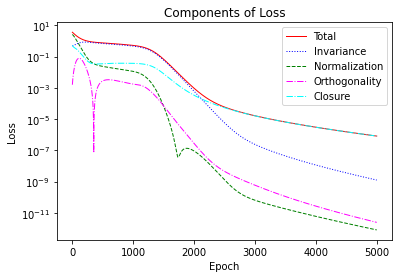

In [47]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[-3.7728e-04,  2.7733e-01, -3.9393e-01,  7.2135e-01],
        [-2.7742e-01, -1.2815e-04, -4.1581e-01, -7.8358e-02],
        [ 3.9401e-01,  4.1592e-01, -2.0037e-04, -2.6161e-01],
        [-7.2125e-01,  7.8232e-02,  2.6185e-01, -2.9726e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-1.2498e-04,  5.7793e-02,  4.1428e-01, -2.6939e-01],
        [-5.7696e-02, -3.7214e-04, -6.4986e-01, -5.6526e-01],
        [-4.1430e-01,  6.4973e-01, -3.0108e-04, -1.0335e-01],
        [ 2.6935e-01,  5.6536e-01,  1.0308e-01, -2.0346e-04]],
       requires_grad=True) 



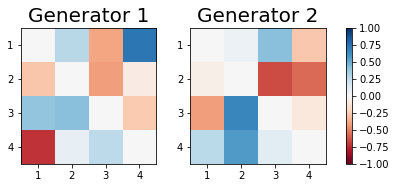

In [48]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

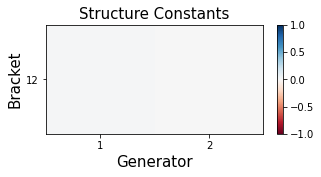

In [49]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [50]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.008166 0.007569]
 
 C = 
  [[0.000006 -0.002139 -0.011225 -0.007033]
 [0.002141 0.000015 0.010514 -0.005872]
 [0.011165 -0.010540 0.000004 0.011403]
 [0.007051 0.005848 -0.011404 -0.000010]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.006022999354186824. 
 

Total MAE = 0.006022999354186824


In [51]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0164735849 rad, 89.0560904149 deg


##  $n_{dim} = 4$, $n_{gen} =3$

Using cpu device
Epoch 5000   |  Train Loss: 3.289967650132549e-066
Total Time: 34.86832881
Complete.


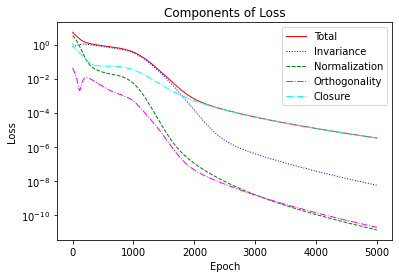

In [52]:
n       = 300
n_dim   = 4
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                  include_sc = include_sc)

Generator 1: 
 tensor([[-1.8881e-04,  7.9886e-02,  2.8381e-01,  5.6250e-01],
        [-7.9428e-02, -1.7619e-04, -2.4131e-01, -5.3705e-01],
        [-2.8360e-01,  2.4095e-01, -2.0350e-04, -5.0021e-01],
        [-5.6263e-01,  5.3715e-01,  4.9994e-01, -4.2554e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-1.8906e-04, -1.9433e-01,  5.0649e-01, -3.0359e-01],
        [ 1.9474e-01, -2.5453e-04, -4.9748e-01,  4.8315e-01],
        [-5.0648e-01,  4.9778e-01, -3.2585e-04, -3.6382e-01],
        [ 3.0342e-01, -4.8306e-01,  3.6418e-01, -2.3620e-04]],
       requires_grad=True) 

Generator 3: 
 tensor([[-4.7863e-05,  7.2506e-02, -2.7662e-01, -7.0472e-02],
        [-7.2320e-02, -1.7277e-04,  5.3066e-01,  2.5363e-01],
        [ 2.7661e-01, -5.3046e-01, -4.5511e-04, -7.5329e-01],
        [ 7.0657e-02, -2.5401e-01,  7.5315e-01, -3.1953e-04]],
       requires_grad=True) 



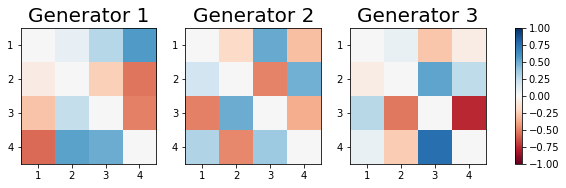

In [53]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

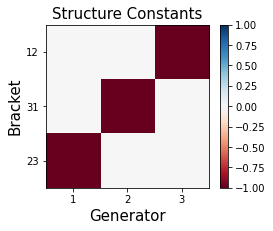

In [54]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [55]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000006 0.000159 -1.001396]
 
 C = 
  [[-0.000162 -0.016781 -0.007121 0.013709]
 [0.017557 -0.000637 -0.001139 0.007539]
 [0.007039 0.001351 -0.000383 0.000326]
 [-0.013087 -0.007972 -0.000840 0.000186]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.005989352554953506. 
 

31: 
 Structure Constants = [-0.000004 -1.000766 -0.000001]
 
 C = 
  [[-0.000321 -0.005540 -0.011775 -0.010697]
 [0.006394 -0.000591 -0.009165 -0.010117]
 [0.011976 0.009051 -0.000001 -0.004488]
 [0.010956 0.009538 0.005367 -0.000093]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.006629428592684565. 
 

23: 
 Structure Constants = [-1.000761 -0.000000 0.000002]
 
 C = 
  [[-0.000324 -0.007929 0.013745 -0.003478]
 [0.008881 -0.000572 0.012963 -0.005398]
 [-0.013907 -0.013126 0.000376 0.001645]
 [0.003613 0.005128 -0.002089 -0.000475]] 

The structure constants were found successfully with a mean absolut

In [56]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.7452564193 rad, 41.8188718659 deg
Angle between generator 1 and 3: 0.6086195617 rad, 52.5102449170 deg
Angle between generator 2 and 3: 0.7524118113 rad, 41.2002694446 deg


##  $n_{dim} = 4$, $n_{gen} =4$

Using cpu device
Epoch 6000   |  Train Loss: 1.800735600069112e-066
Total Time: 72.36983395
Complete.


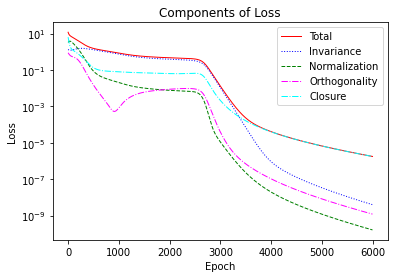

In [57]:
n       = 300
n_dim   = 4
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[-4.0084e-04,  4.0764e-01,  1.2608e-01,  7.9124e-01],
        [-4.0793e-01, -1.4748e-04,  1.1598e-01,  3.3635e-01],
        [-1.2583e-01, -1.1592e-01, -5.2012e-05, -2.5536e-01],
        [-7.9113e-01, -3.3670e-01,  2.5523e-01, -4.0066e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-1.8165e-04,  2.8809e-01,  4.9720e-01, -1.6985e-01],
        [-2.8774e-01, -3.2125e-04, -7.4221e-01, -9.5957e-02],
        [-4.9746e-01,  7.4204e-01, -4.3612e-04, -2.8454e-01],
        [ 1.6967e-01,  9.6202e-02,  2.8458e-01, -6.0485e-05]],
       requires_grad=True) 

Generator 3: 
 tensor([[-2.3319e-04, -3.9827e-01,  5.0660e-01,  2.2511e-01],
        [ 3.9825e-01, -2.9667e-04,  3.2527e-01, -5.7926e-01],
        [-5.0664e-01, -3.2525e-01, -2.2756e-04, -3.0452e-01],
        [-2.2502e-01,  5.7925e-01,  3.0454e-01, -2.4103e-04]],
       requires_grad=True) 

Generator 4: 
 tensor([[-1.9255e-04,  5.3211e-01,  2.8389e-01,  3.2589e-02],
        [-5.3221e-01, -2.2409e-04,  1.7403e-

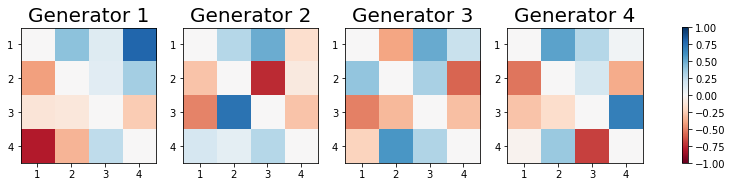

In [58]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

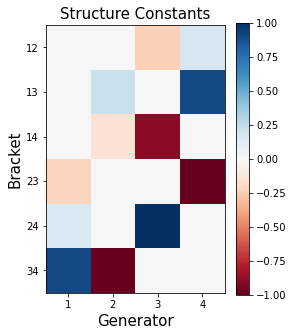

In [59]:
if n_gen>1:
    figsizec=(4,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [60]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000242 -0.000001 -0.239571 0.169440]
 
 C = 
  [[-0.000082 -0.015479 0.005642 0.003771]
 [0.015421 -0.000187 0.002187 -0.001911]
 [-0.005916 -0.002258 0.000081 -0.012824]
 [-0.003516 0.001758 0.012957 0.000119]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.005256790420921999. 
 

13: 
 Structure Constants = [-0.000160 0.223259 0.000027 0.903429]
 
 C = 
  [[0.000003 0.006943 -0.005353 -0.002611]
 [-0.006742 0.000172 0.001873 -0.005704]
 [0.004905 -0.002381 0.000463 -0.006724]
 [0.002636 0.005280 0.006477 0.000496]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0036727136251465276. 
 

14: 
 Structure Constants = [0.000220 -0.143834 -0.902923 0.000001]
 
 C = 
  [[-0.000162 -0.005552 -0.012601 0.008639]
 [0.005336 -0.000551 0.001485 -0.005280]
 [0.012218 -0.001354 -0.000134 0.005924]
 [-0.008175 0.005275 -0.005629 -0.000198]] 

The structure constants were found successfu

In [61]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: -0.1622819647 rad, 99.3393745026 deg
Angle between generator 1 and 3: 0.6582638092 rad, 48.8324049471 deg
Angle between generator 1 and 4: 0.4710787895 rad, 61.8956540926 deg
Angle between generator 2 and 3: 0.4939620625 rad, 60.3986691727 deg
Angle between generator 2 and 4: -0.2112377620 rad, 102.1948981176 deg
Angle between generator 3 and 4: -0.1449173472 rad, 98.3324929789 deg


##  $n_{dim} = 4$, $n_{gen} =6$

Using cpu device
Epoch 6000   |  Train Loss: 5.927109339634029e-076
Total Time: 158.74912500
Complete.


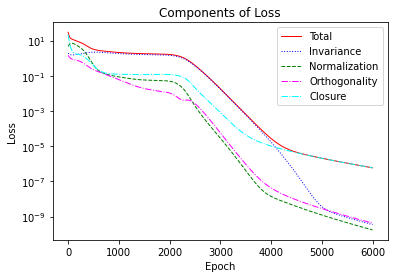

In [62]:
n       = 300
n_dim   = 4
n_gen   = 6    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc )

Generator 1: 
 tensor([[-4.2443e-04,  6.4968e-01, -1.7766e-03,  6.5586e-01],
        [-6.4966e-01, -2.2207e-04,  1.4041e-01, -2.2287e-02],
        [ 2.1027e-03, -1.4043e-01, -7.3845e-05, -3.5714e-01],
        [-6.5589e-01,  2.1818e-02,  3.5714e-01, -2.7793e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[-7.5776e-05,  2.7193e-03,  1.3918e-01, -3.5887e-01],
        [-2.6409e-03, -8.8954e-05, -4.2134e-01,  1.0158e-02],
        [-1.3948e-01,  4.2134e-01, -4.3377e-04, -8.2107e-01],
        [ 3.5876e-01, -9.8195e-03,  8.2113e-01, -4.0143e-04]],
       requires_grad=True) 

Generator 3: 
 tensor([[-1.4614e-04, -4.9605e-01,  6.4653e-02,  1.9239e-01],
        [ 4.9591e-01, -4.1169e-04,  5.6536e-01,  5.1441e-01],
        [-6.4853e-02, -5.6515e-01, -2.2648e-04, -3.5871e-01],
        [-1.9265e-01, -5.1452e-01,  3.5841e-01, -2.1636e-04]],
       requires_grad=True) 

Generator 4: 
 tensor([[-4.6280e-04,  2.2309e-01,  9.2836e-01, -1.3379e-01],
        [-2.2314e-01, -4.6476e-05,  8.2796e-

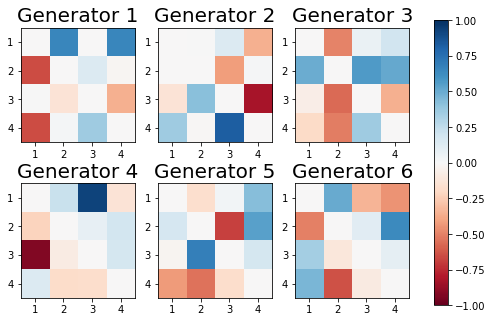

In [63]:
figsizeg = (10,5.25)
rows = 2
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

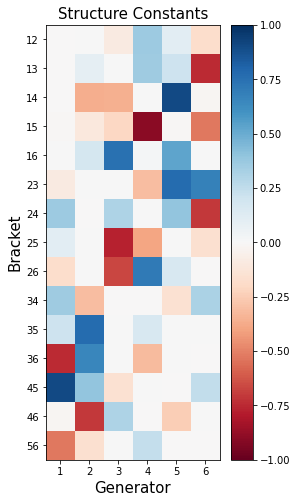

In [64]:
if n_gen>1:
    figsizec=(4,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [65]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.000601 0.000018 -0.090695 0.365144 0.105735 -0.172055]
 
 C = 
  [[0.000041 -0.001369 -0.001186 0.001484]
 [0.001589 -0.000098 0.000340 0.001966]
 [0.001107 -0.000488 0.000191 -0.001268]
 [-0.001997 -0.001892 0.000988 0.000072]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0010048739000185119. 
 

13: 
 Structure Constants = [-0.005433 0.088137 0.002620 0.356412 0.206803 -0.748549]
 
 C = 
  [[-0.000297 0.005511 0.002317 0.002239]
 [-0.005535 0.000219 -0.000091 -0.001078]
 [-0.002242 0.000018 0.000287 -0.000830]
 [-0.002702 0.001577 0.000329 -0.000310]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0015989573775882428. 
 

14: 
 Structure Constants = [-0.000111 -0.362455 -0.358666 0.000062 0.899958 -0.021161]
 
 C = 
  [[-0.000202 0.000752 -0.000783 0.000311]
 [-0.000177 0.000257 0.001161 -0.000866]
 [-0.000209 -0.001014 0.000277 0.000530]
 [0.000423 0.000848 -0.001310 -

In [66]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.0286249086 rad, 88.3596894899 deg
Angle between generator 1 and 3: 0.0498836058 rad, 87.1406932448 deg
Angle between generator 1 and 4: 0.1939029847 rad, 78.8193538609 deg
Angle between generator 1 and 5: 0.3984123826 rad, 66.5210337007 deg
Angle between generator 1 and 6: 0.9239043799 rad, 22.4962795335 deg
Angle between generator 2 and 3: 0.9347132470 rad, 20.8181326985 deg
Angle between generator 2 and 4: 0.0445496237 rad, 87.4466495154 deg
Angle between generator 2 and 5: 0.8534154139 rad, 31.4148850307 deg
Angle between generator 2 and 6: -0.1660055258 rad, 99.5556524822 deg
Angle between generator 3 and 4: -0.2138221707 rad, 102.3464358292 deg
Angle between generator 3 and 5: 0.8999145329 rad, 25.8531647547 deg
Angle between generator 3 and 6: -0.0962222221 rad, 95.5216702773 deg
Angle between generator 4 and 5: 0.0790006207 rad, 85.4688762976 deg
Angle between generator 4 and 6: -0.1097252396 rad, 96.2994770868 deg
Angle between generator 5 and

---

# Lorentz Groups: Figures 14-22: $n_{dim} = 4$, $n_{gen}=2,3,4,6$

##  Non-Abelian: $n_{dim} = 4$, $n_{gen} =2$

Using cpu device
Epoch 5000   |  Train Loss: 9.22543939679196e-0665
Total Time: 25.48006296
Complete.


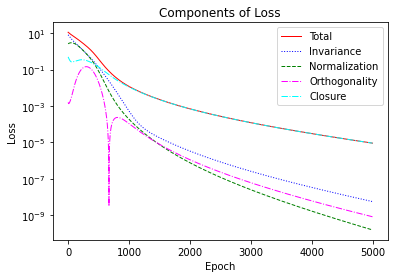

In [67]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(10)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 4.4092e-04,  6.3650e-01, -6.4931e-01,  2.3386e-01],
        [ 6.3657e-01,  1.8021e-04, -4.1915e-02,  2.2019e-01],
        [-6.4934e-01,  4.1562e-02,  1.7369e-04, -2.6157e-01],
        [ 2.3354e-01, -2.2002e-01,  2.6147e-01, -3.1284e-05]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 2.8957e-04, -5.6440e-01, -9.9830e-02,  5.0155e-01],
        [-5.6420e-01,  8.9464e-06, -4.5352e-01,  3.1070e-01],
        [-1.0026e-01,  4.5368e-01, -1.5736e-04, -3.4289e-01],
        [ 5.0169e-01, -3.1082e-01,  3.4299e-01,  1.8858e-05]],
       requires_grad=True) 



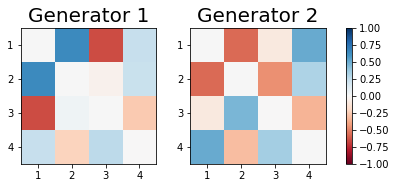

In [68]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

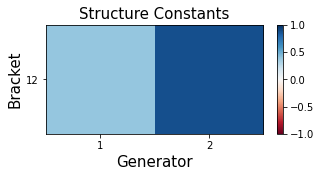

In [69]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [70]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.386593 0.875657]
 
 C = 
  [[0.000213 -0.004934 -0.024553 -0.010856]
 [-0.004107 -0.000494 -0.022263 -0.010164]
 [-0.024838 0.022825 -0.000097 0.012045]
 [-0.011274 0.010529 -0.012344 -0.000057]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.010724506021685704. 
 

Total MAE = 0.010724506021685704


In [71]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.7210584163 rad, 43.8580654824 deg


## Abelian: $n_{dim} = 4$, $n_{gen} =2$

Using cpu device
Epoch 5000   |  Train Loss: 1.0290739264632345e-05
Total Time: 20.16259003
Complete.


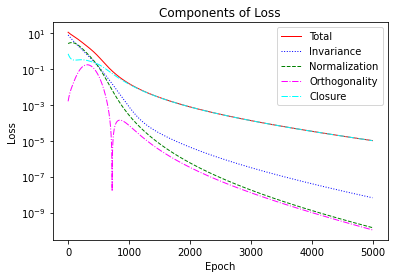

In [72]:
n       = 300
n_dim   = 4
n_gen   = 2    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 5000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(7)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 4.6172e-04,  6.9013e-01, -6.2649e-01,  2.2309e-01],
        [ 6.9021e-01,  2.1752e-04, -7.0553e-02,  1.9205e-01],
        [-6.2650e-01,  7.0163e-02,  1.7057e-04, -1.9917e-01],
        [ 2.2283e-01, -1.9190e-01,  1.9908e-01, -5.9871e-06]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 2.8086e-04, -5.4110e-01, -1.5931e-01,  4.9503e-01],
        [-5.4085e-01, -2.8494e-05, -4.5694e-01,  3.7353e-01],
        [-1.5971e-01,  4.5714e-01, -1.3473e-04, -2.9711e-01],
        [ 4.9519e-01, -3.7365e-01,  2.9720e-01,  6.8161e-06]],
       requires_grad=True) 



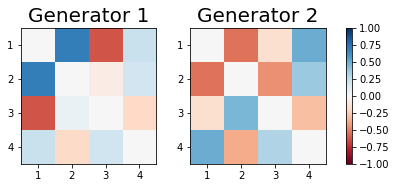

In [73]:
figsizeg = (8,2.5)
rows = 1
cols = 2

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

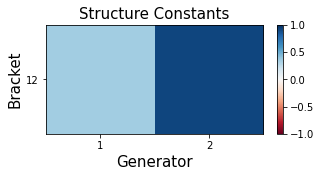

In [74]:
if n_gen>1:
    figsizec=(5,2)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [75]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.347813 0.918902]
 
 C = 
  [[0.000215 -0.006734 -0.021264 -0.016199]
 [-0.005871 -0.000542 -0.021673 -0.017658]
 [-0.021446 0.022140 -0.000036 0.006115]
 [-0.016609 0.018026 -0.006362 -0.000045]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.011308425442001228. 
 

Total MAE = 0.011308425442001228


In [76]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.7741173796 rad, 39.2749204454 deg


## $n_{dim} = 4$, $n_{gen} =3$

Using cpu device
Epoch 6000   |  Train Loss: 4.924761838815972e-066
Total Time: 45.98428583
Complete.


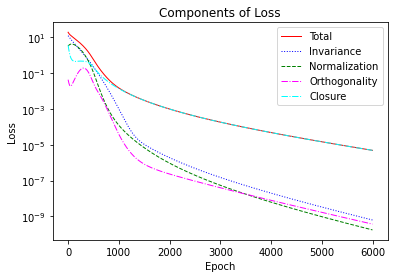

In [77]:
n       = 300
n_dim   = 4
n_gen   = 3    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(7)
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 2.9998e-04,  5.1117e-01,  4.5608e-01,  3.6231e-01],
        [ 5.1092e-01, -4.7497e-05, -7.5389e-02, -5.9181e-01],
        [ 4.5605e-01,  7.5501e-02,  7.8818e-05, -2.0822e-01],
        [ 3.6270e-01,  5.9201e-01,  2.0834e-01, -1.3037e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 2.8640e-04, -6.2402e-01,  2.1902e-01,  3.6894e-01],
        [-6.2411e-01,  6.8840e-05, -4.9660e-01,  6.6467e-02],
        [ 2.1856e-01,  4.9649e-01, -1.8678e-04, -4.1890e-01],
        [ 3.6907e-01, -6.6492e-02,  4.1902e-01, -2.1229e-05]],
       requires_grad=True) 

Generator 3: 
 tensor([[ 3.1533e-04, -6.3069e-02, -5.9985e-01,  5.1724e-01],
        [-6.3426e-02, -1.2133e-04,  4.7653e-01, -1.3774e-01],
        [-6.0000e-01, -4.7653e-01,  5.1241e-06, -3.5033e-01],
        [ 5.1702e-01,  1.3754e-01,  3.5009e-01,  6.2787e-05]],
       requires_grad=True) 



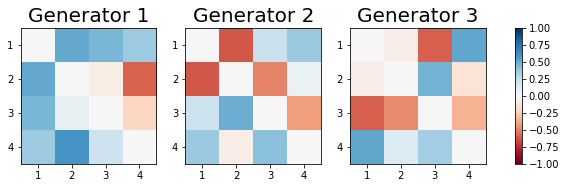

In [78]:
figsizeg = (12,2.5)
rows = 1
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

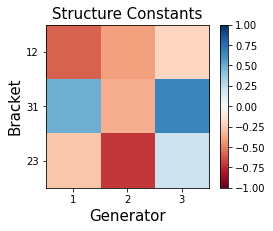

In [79]:
if n_gen>1:
    figsizec=(4,3)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [80]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.590998 -0.411000 -0.217502]
 
 C = 
  [[-0.000138 -0.001022 0.002990 -0.002472]
 [-0.000552 0.000237 -0.010209 -0.009540]
 [0.003324 0.010644 0.000138 0.016368]
 [-0.002617 0.009331 -0.016516 0.000000]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.005381127856717266. 
 

31: 
 Structure Constants = [0.486826 -0.365578 0.661051]
 
 C = 
  [[0.000320 -0.006620 -0.003069 0.008855]
 [-0.007102 -0.000162 -0.003746 -0.009298]
 [-0.003855 0.003130 -0.000345 0.019040]
 [0.009185 0.009558 -0.018686 -0.000029]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.006437416768087083. 
 

23: 
 Structure Constants = [-0.274849 -0.705158 0.218023]
 
 C = 
  [[-0.000024 -0.006951 -0.006028 0.009173]
 [-0.007091 -0.000119 -0.005486 -0.011577]
 [-0.005553 0.005698 0.000292 0.021491]
 [0.009278 0.011702 -0.021561 -0.000046]] 

The structure constants were found successfully with a mean absolute

In [81]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.4967018569 rad, 60.2179645539 deg
Angle between generator 1 and 3: -0.4880515842 rad, 119.2125981172 deg
Angle between generator 2 and 3: -0.9998496049 rad, 179.0062892683 deg


## $n_{dim} = 4$, $n_{gen} =4$

Using cpu device
Epoch 6000   |  Train Loss: 9.474147253844429e-065
Total Time: 78.07101583
Complete.


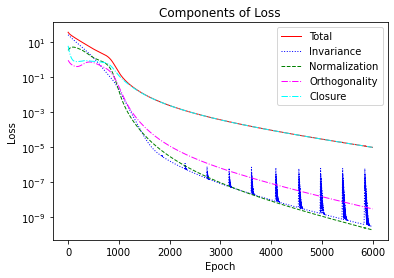

In [83]:
n       = 300
n_dim   = 4
n_gen   = 4    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(0)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 3.0725e-04,  5.7711e-01,  1.2041e-01,  5.1469e-01],
        [ 5.7678e-01, -2.3047e-05, -1.0818e-01, -6.0675e-01],
        [ 1.2052e-01,  1.0830e-01, -1.4285e-06,  8.6630e-02],
        [ 5.1503e-01,  6.0704e-01, -8.6631e-02, -5.5808e-05]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 4.2689e-04, -7.9851e-01,  1.3889e-01,  4.4458e-01],
        [-7.9867e-01,  2.5538e-04, -1.9017e-01, -3.0139e-01],
        [ 1.3880e-01,  1.9010e-01, -1.7735e-05,  1.3628e-01],
        [ 4.4432e-01,  3.0101e-01, -1.3628e-01,  4.4159e-05]],
       requires_grad=True) 

Generator 3: 
 tensor([[ 2.5813e-04, -9.1633e-02, -6.8685e-01,  1.9080e-01],
        [-9.2123e-02, -2.3188e-04,  6.6732e-01, -1.6612e-01],
        [-6.8677e-01, -6.6724e-01,  8.0324e-06,  1.0281e-01],
        [ 1.9086e-01,  1.6617e-01, -1.0283e-01, -1.0230e-06]],
       requires_grad=True) 

Generator 4: 
 tensor([[ 1.0505e-05,  7.4612e-02, -3.3273e-02, -1.1883e-01],
        [ 7.4601e-02, -1.0970e-05, -1.1000e-

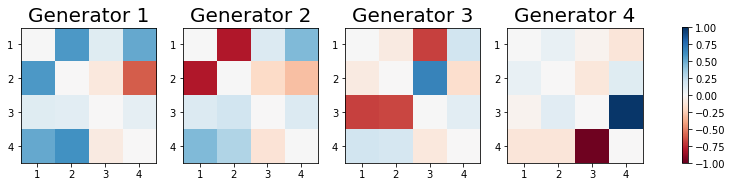

In [84]:
figsizeg = (16,2.5)
rows = 1
cols = 4

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

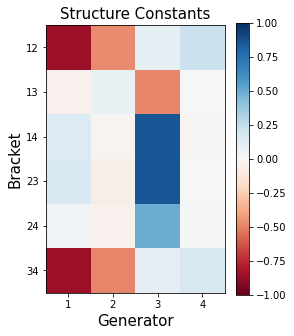

In [85]:
if n_gen>1:
    figsizec=(4,5)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [86]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [-0.851631 -0.473755 0.091108 0.218107]
 
 C = 
  [[-0.000222 -0.002197 0.010408 0.003393]
 [-0.001139 0.000826 0.013856 -0.001717]
 [0.010418 -0.013839 0.000091 -0.018992]
 [0.003632 0.001878 0.019014 0.000040]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.006353816722307916. 
 

13: 
 Structure Constants = [-0.042554 0.072376 -0.487665 -0.000447]
 
 C = 
  [[-0.000154 0.001130 -0.001336 0.003070]
 [0.001393 0.000109 -0.002571 0.003427]
 [-0.001145 0.002751 0.000004 -0.001966]
 [0.002967 -0.003518 0.001932 0.000014]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0017180453577725018. 
 

14: 
 Structure Constants = [0.134401 -0.027497 0.859217 -0.015271]
 
 C = 
  [[-0.000191 0.006321 0.009287 0.013238]
 [0.006762 0.000253 0.008782 0.015176]
 [0.009117 -0.008981 -0.000028 0.001497]
 [0.013882 -0.014519 -0.001448 -0.000087]] 

The structure constants were found successfully w

In [87]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.5980315469 rad, 53.2709527187 deg
Angle between generator 1 and 3: 0.5989056204 rad, 53.2084413762 deg
Angle between generator 1 and 4: 0.3871823597 rad, 67.2207091857 deg
Angle between generator 2 and 3: 0.9991541189 rad, 2.3568009403 deg
Angle between generator 2 and 4: 0.0188356216 rad, 88.9207345560 deg
Angle between generator 3 and 4: 0.0274330078 rad, 88.4280072177 deg


## $n_{dim} = 4$, $n_{gen} =6$

Using cpu device
Epoch 6000   |  Train Loss: 1.083564896779169e-066
Total Time: 177.60218000
Complete.


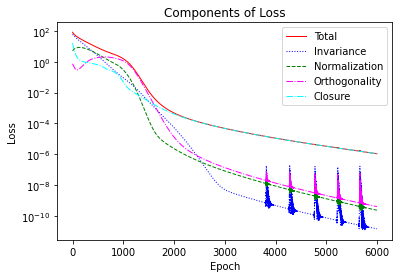

In [88]:
n       = 300
n_dim   = 4
n_gen   = 6    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 6000
oracle = oracle_lorentz

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(2)
include_sc = True
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

Generator 1: 
 tensor([[ 3.3445e-04, -1.0092e-01,  8.1109e-01,  2.9088e-02],
        [-1.0118e-01, -1.3759e-04, -3.0061e-01, -4.4163e-01],
        [ 8.1105e-01,  3.0044e-01,  2.6079e-04, -2.1389e-01],
        [ 2.9217e-02,  4.4169e-01,  2.1378e-01, -1.1997e-04]],
       requires_grad=True) 

Generator 2: 
 tensor([[ 4.6459e-04, -1.7749e-02,  1.8877e-01, -9.4509e-01],
        [-1.7850e-02, -3.5045e-05,  2.1845e-01,  1.5046e-01],
        [ 1.8879e-01, -2.1845e-01, -5.9795e-06, -2.2252e-02],
        [-9.4509e-01, -1.5045e-01,  2.2041e-02,  4.3493e-04]],
       requires_grad=True) 

Generator 3: 
 tensor([[ 8.4458e-05, -3.9019e-01,  9.8044e-02,  8.4820e-02],
        [-3.9017e-01, -1.7430e-04,  5.8381e-01, -4.0002e-01],
        [ 9.8321e-02, -5.8362e-01, -3.3067e-04,  5.7465e-01],
        [ 8.4607e-02,  4.0033e-01, -5.7440e-01, -2.4149e-04]],
       requires_grad=True) 

Generator 4: 
 tensor([[ 3.4835e-04, -8.2145e-01,  1.1107e-01,  9.7746e-02],
        [-8.2141e-01,  1.9142e-04, -1.1360e-

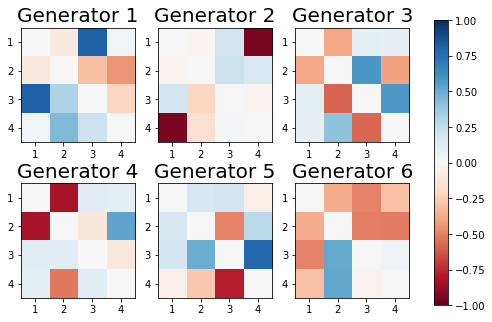

In [89]:
figsizeg = (10,5.25)
rows = 2
cols = 3

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)

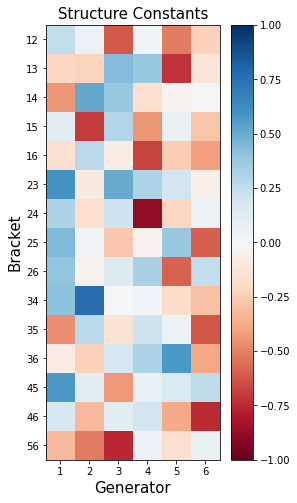

In [90]:
if n_gen>1:
    figsizec=(4,8)
    visualize_structure_constants(figsize=figsizec, n_gen=n_gen, n_com=n_com, struc_pred=struc_pred)

In [91]:
if n_gen>1:
    verify_struc_constants(n_gen=n_gen, struc_pred=struc_pred, gens_pred=gens_pred)

12: 
 Structure Constants = [0.247039 0.060935 -0.611031 0.045793 -0.520201 -0.233523]
 
 C = 
  [[0.000151 0.001466 0.001029 -0.000599]
 [0.001388 -0.000183 -0.002446 0.000997]
 [0.001946 0.002514 -0.000505 0.001105]
 [0.000011 -0.001097 -0.001046 -0.000487]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0010608445714271302. 
 

13: 
 Structure Constants = [-0.207142 -0.225682 0.432480 0.381939 -0.724928 -0.117641]
 
 C = 
  [[0.000164 0.001554 -0.005623 -0.000672]
 [0.001644 -0.000127 0.001394 0.004921]
 [-0.005142 -0.002232 -0.000363 0.002143]
 [-0.000990 -0.005379 -0.001413 0.000088]] 

The structure constants were found successfully with a mean absolute error (MAE) of 0.0021156606709991825. 
 

14: 
 Structure Constants = [-0.440274 0.511074 0.379335 -0.161329 -0.035011 0.013592]
 
 C = 
  [[-0.000362 -0.009384 0.001314 0.001511]
 [-0.008936 0.000254 0.000106 0.004497]
 [0.001814 -0.000054 0.000291 -0.006498]
 [0.001389 -0.004450 0.005975 

In [92]:
if n_gen>1:
    verify_orthogonality(gens_pred=gens_pred)

Angle between generator 1 and 2: 0.6326895577 rad, 50.7511668460 deg
Angle between generator 1 and 3: -0.6233829835 rad, 128.5636009127 deg
Angle between generator 1 and 4: 0.6360212960 rad, 50.5042266920 deg
Angle between generator 1 and 5: 0.2435419629 rad, 75.9043153671 deg
Angle between generator 1 and 6: 0.0030133020 rad, 89.8273502499 deg
Angle between generator 2 and 3: -0.9120778438 rad, 155.7940921847 deg
Angle between generator 2 and 4: 0.1827236618 rad, 79.4715542329 deg
Angle between generator 2 and 5: 0.7756289058 rad, 39.1379138161 deg
Angle between generator 2 and 6: 0.4173006043 rad, 65.3357197208 deg
Angle between generator 3 and 4: -0.4214699003 rad, 114.9274232729 deg
Angle between generator 3 and 5: -0.5819870600 rad, 125.5904235581 deg
Angle between generator 3 and 6: -0.4288339909 rad, 115.3935850154 deg
Angle between generator 4 and 5: 0.0198813627 rad, 88.8608067688 deg
Angle between generator 4 and 6: 0.3398841443 rad, 70.1301843263 deg
Angle between generator 

---

# Squeeze Map and Discontinuous Oracles: Figures 25-27: $n_{dim}=2$, $n_{gen}=1$

## $n_{dim} = 2$, $n_{gen} =1$

Epoch 2000   |  Train Loss: 1.708072839193266e-055
Total Time: 4.39689302
Complete.


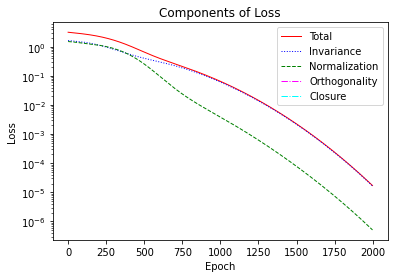

In [3]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 2000
oracle = oracle_squeeze

# Set Random Seeds
np.random.seed(2) # 7
torch.manual_seed(2)
include_sc = False
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

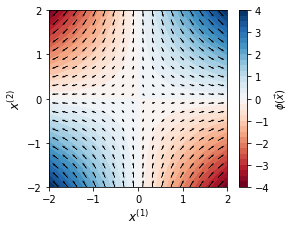

In [4]:
if n_dim==2:
    draw_sym_vectors(M = gens_pred[0], oracle=oracle)

Epoch 1   |  Train Loss: 1051824.3286825358
Epoch 1001   |  Train Loss: 130336.14411626819
Epoch 2001   |  Train Loss: 80617.8430102243
Epoch 3001   |  Train Loss: 17506.269884146892
Epoch 4001   |  Train Loss: 11317.013525453773
Epoch 5001   |  Train Loss: 9968.005254588497
Epoch 6001   |  Train Loss: 9560.734206361532
Epoch 7001   |  Train Loss: 7974.9853856808195
Epoch 8001   |  Train Loss: 1781.7362947847164
Epoch 9001   |  Train Loss: 184.84439950363952
Epoch 10001   |  Train Loss: 40.01229050441213
Epoch 11001   |  Train Loss: 76.20948442014267
Epoch 12001   |  Train Loss: 8.640725050170683
Epoch 13001   |  Train Loss: 4.044379517106008
Epoch 14001   |  Train Loss: 2.006799964500681
Epoch 15001   |  Train Loss: 1.1139811635686547
Epoch 16001   |  Train Loss: 0.6305495040666029
Epoch 17001   |  Train Loss: 1.820857570179966
Epoch 18001   |  Train Loss: 1.1339457281504526
Epoch 19001   |  Train Loss: 2.593722233960448
Epoch 20000   |  Train Loss: 0.17593901718809693
Total Time: 55.

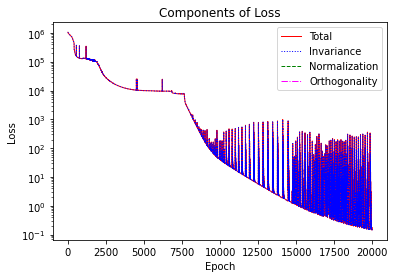

In [3]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 20000
oracle = oracle_piecewise_linear

# Set Random Seeds
np.random.seed(1)
torch.manual_seed(1)

model = run_model_nonlinear(n      = n,
                            n_dim  = n_dim,
                            n_gen  = n_gen,
                            eps    = eps,
                            lr     = lr,
                            epochs = epochs,
                            oracle = oracle)

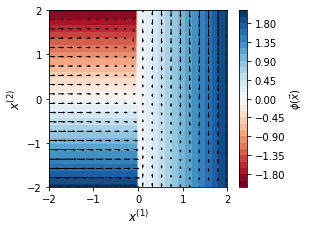

In [4]:
if n_dim==2:
    draw_vectors_nonlinear(model=model, oracle=oracle, eps = eps)

Epoch 1   |  Train Loss: 1045929.3489962567
Epoch 1001   |  Train Loss: 23269.13808159671
Epoch 2001   |  Train Loss: 911.8416705099987
Epoch 3001   |  Train Loss: 66.00829726017906
Epoch 4001   |  Train Loss: 16.582383862934492
Epoch 5001   |  Train Loss: 3.8261277389192947
Epoch 6001   |  Train Loss: 0.4521980884504286
Epoch 7001   |  Train Loss: 0.04082914257976346
Epoch 8001   |  Train Loss: 0.0020115698588287095
Epoch 9001   |  Train Loss: 0.1814991490980858
Epoch 10001   |  Train Loss: 8.428577695370837e-06
Epoch 11001   |  Train Loss: 8.012689802038171e-06
Epoch 12001   |  Train Loss: 0.010401248266824424
Epoch 13001   |  Train Loss: 1.5233244426764258e-05
Epoch 14001   |  Train Loss: 1.0861353541287349e-05
Epoch 15001   |  Train Loss: 7.189843360574817e-06
Epoch 16001   |  Train Loss: 0.01517278679350868
Epoch 17001   |  Train Loss: 2.1167901216674078e-05
Epoch 18001   |  Train Loss: 3.0284961519569663e-05
Epoch 19001   |  Train Loss: 1.3376947069069244e-05
Epoch 20001   |  Tra

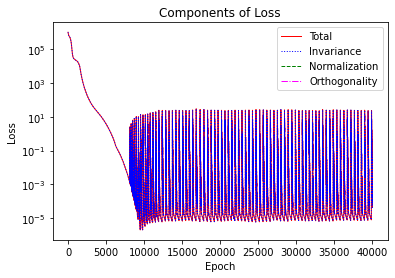

In [25]:
n       = 300
n_dim   = 2
n_gen   = 1    #int(n_dim*(n_dim-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 40000
oracle = oracle_manhattan

# Set Random Seeds
np.random.seed(0)
torch.manual_seed(6)

model_manhattan = run_model_nonlinear(  n      = n,
                                        n_dim  = n_dim,
                                        n_gen  = n_gen,
                                        eps    = eps,
                                        lr     = lr,
                                        epochs = epochs,
                                        oracle = oracle)

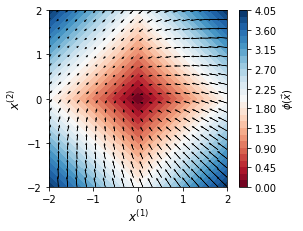

In [26]:
if n_dim==2:
    draw_vectors_nonlinear(model=model_manhattan, oracle=oracle, eps=eps)

---

# SO(10): Figure 26: $n_{dim} =10, n_{gen} = 45$

Epoch 2000   |  Train Loss: 0.44691761766389616
Total Time: 495.20263338
Complete.


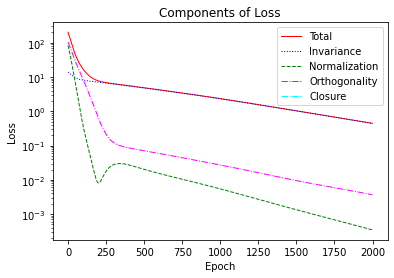

In [19]:
n       = 300
n_dim   = 10
n_gen   = 45    #int(n_dim*(n_dim-1)/2)
n_com   = int(n_gen*(n_gen-1)/2)
eps     = 1e-3
lr      = 1e-3
epochs  = 2000
oracle = oracle_norm

# Set Random Seeds
np.random.seed(0) # 7
torch.manual_seed(0)
include_sc = False
struc_pred, gens_pred = run_model( n      = n,
                                   n_dim  = n_dim,
                                   n_gen  = n_gen,
                                   n_com  = n_com,
                                   eps    = eps,
                                   lr     = lr,
                                   epochs = epochs,
                                   oracle = oracle,
                                   include_sc = include_sc)

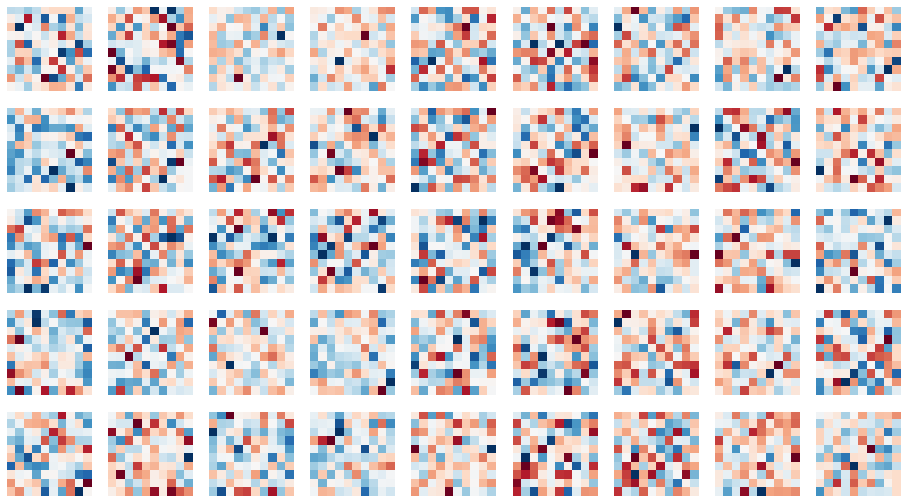

In [127]:
figsizeg = (16,9)
rows = 5
cols = 9

visualize_generators(figsize=figsizeg, n_dim=n_dim, n_gen=n_gen, eps=eps, gens_pred= gens_pred, rows=rows, cols=cols)